In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import csv
from scipy import stats
from sklearn.linear_model import LinearRegression

In [3]:
titanic_original = pd.read_csv("titanic.csv")

In [4]:
titanic_processed = titanic_original.drop(["Cabin", "Boat", "Ticket"], axis=1)

In [5]:
titanic_processed

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,S,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,S,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,14.4542,C,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,7.2250,C,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,7.2250,C,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,7.8750,S,NaN,NaN


In [6]:
titanic_processed.describe()

,Pclass,Survived,Age,Sibsp,Parch,Fare,Body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
titanic_processed.isnull()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Body,home.dest
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,True
1306,False,False,False,False,False,False,False,False,False,False,True
1307,False,False,False,False,False,False,False,False,False,True,True
1308,False,False,False,False,False,False,False,False,False,True,True


In [8]:
titanic_processed["Age"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1305     True
1306    False
1307    False
1308    False
1309     True
Name: Age, Length: 1310, dtype: bool

In [9]:
titanic_processed.loc[titanic_processed["Age"].isnull()]

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,25.9250,S,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,26.5500,S,NaN,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,39.6000,C,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,31.0000,S,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,27.7208,C,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,7.2500,S,NaN,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,7.2250,C,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,14.4583,C,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,14.4542,C,NaN,NaN


In [10]:
titanic_processed["Age"].median()

28.0

In [11]:
titanic_processed.loc[titanic_processed["Age"].isnull(), "Age"] = titanic_processed["Age"].median()

In [12]:
titanic_processed

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,S,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,S,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0000,1.0,0.0,14.4542,C,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,7.2250,C,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,7.2250,C,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,7.8750,S,NaN,NaN


In [13]:
titanic_processed = titanic_processed[:1309]

In [14]:
titanic_processed

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Fare,Embarked,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,S,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,151.5500,S,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,14.4542,C,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0000,1.0,0.0,14.4542,C,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,7.2250,C,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,7.2250,C,NaN,NaN


In [15]:
titanic_processed.plot?

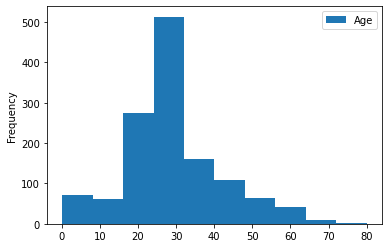

In [16]:
titanic_processed.plot(y = "Age", kind='hist')

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

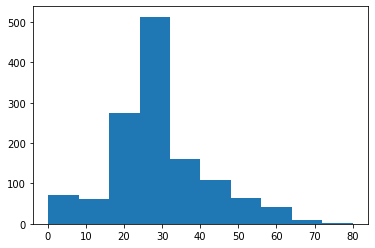

In [17]:
plt.hist(titanic_processed["Age"])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

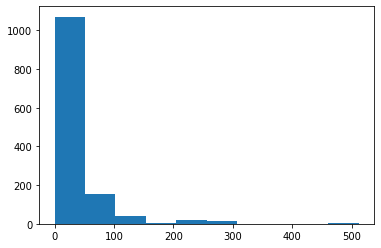

In [18]:
plt.hist(titanic_processed["Fare"])

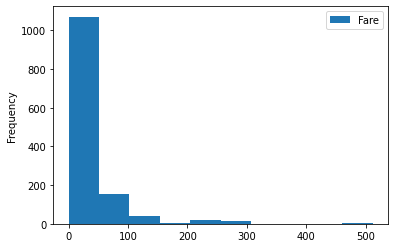

In [19]:
titanic_processed.plot(y = "Fare", kind = "hist")

In [20]:
groups = titanic_processed.groupby("Pclass")

1.0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2.0    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
3.0             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

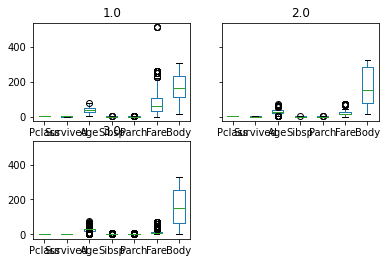

In [21]:
groups.boxplot(grid=False)

Pclass
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

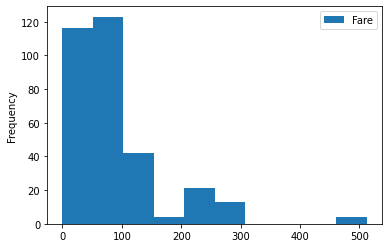

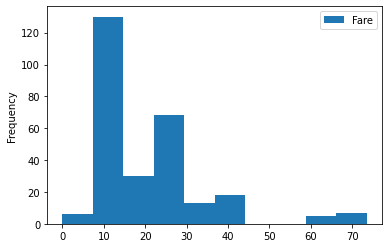

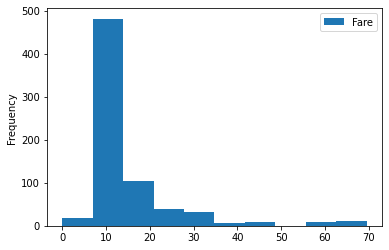

In [22]:
groups.plot(kind = "hist", y = "Fare")

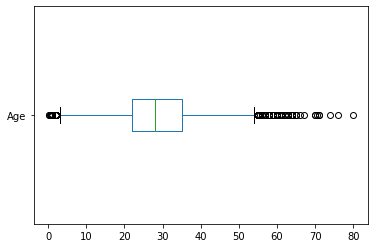

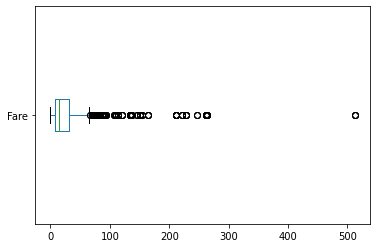

In [25]:
titanic_processed.plot(kind='box', y=['Age'], vert=False)
titanic_processed.plot(kind='box', y=['Fare'], vert=False)

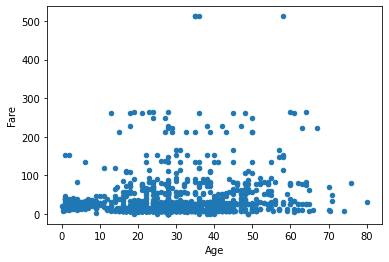

In [26]:
titanic_processed.plot(kind='scatter', x='Age', y='Fare')

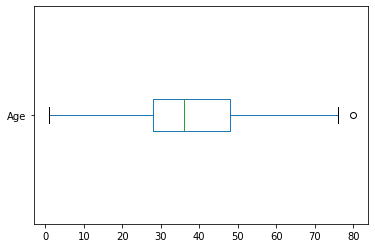

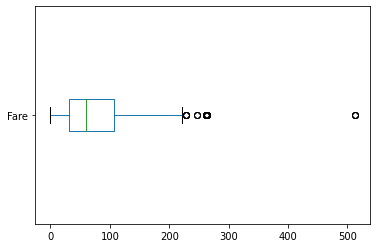

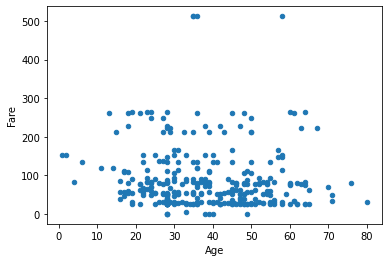

In [31]:
first_class = titanic_processed[titanic_processed['Pclass'] == 1.0]
first_class.plot(kind='box', y=['Age'], vert=False)
first_class.plot(kind='box', y=['Fare'], vert=False)
first_class.plot(kind='scatter', x='Age', y='Fare')